# question: In the Atari game "Tetris", What is the probability that the long “I” piece appears at least twice in 10 random Tetris pieces?

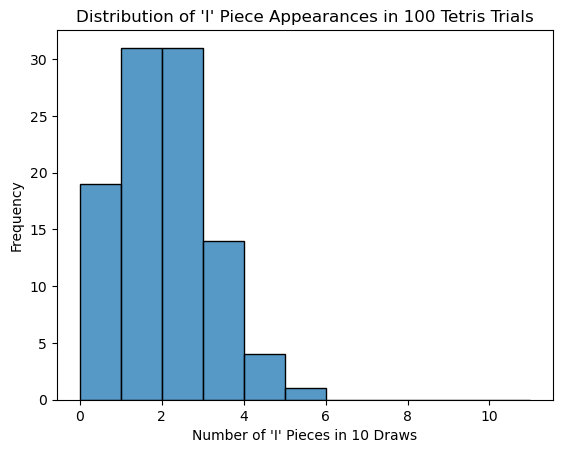

Estimated probability of getting at least two 'I' pieces: 0.500
Theoretical P(X ≥ 2): 0.4292
Empirical   P(X ≥ 2): 0.5000
Difference: 0.0708


In [2]:
# Install
# !pip install gymnasium "gymnasium[atari]" ale-py autorom[accept-rom-license] seaborn matplotlib numpy

import gymnasium as gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Tetris piece identifiers (7 standard tetrominoes)
pieces = ["I", "O", "T", "S", "Z", "J", "L"]

# Parameters
num_trials = 100
pieces_per_trial = 10

# Storage for number of "I" pieces per trial
I_counts = []

for _ in range(num_trials):
    # Randomly generate 10 tetrominoes per trial
    trial_pieces = np.random.choice(pieces, pieces_per_trial, replace=True)
    I_count = np.sum(trial_pieces == "I")
    I_counts.append(I_count)

# Convert to array for analysis
I_counts = np.array(I_counts)

# Visualization
sns.histplot(I_counts, bins=range(0, pieces_per_trial + 2), kde=False)
plt.title("Distribution of 'I' Piece Appearances in 100 Tetris Trials")
plt.xlabel("Number of 'I' Pieces in 10 Draws")
plt.ylabel("Frequency")
plt.show()

# Print some summary stats
prob_at_least_2 = np.mean(I_counts >= 2)
print(f"Estimated probability of getting at least two 'I' pieces: {prob_at_least_2:.3f}")

from scipy.stats import binom

# Parameters
n = 10
p = 1/7

# Theoretical probability of at least 2 "I" pieces
P_theoretical = 1 - (binom.pmf(0, n, p) + binom.pmf(1, n, p))

# Empirical probability from simulation
P_empirical = np.mean(I_counts >= 2)

# Comparison
print(f"Theoretical P(X ≥ 2): {P_theoretical:.4f}")
print(f"Empirical   P(X ≥ 2): {P_empirical:.4f}")
print(f"Difference: {abs(P_theoretical - P_empirical):.4f}")



# Answer: The estimated probabiliy of the player reciving 2 "I" pieces is 0.500. The theoretical possibility would be 0.4292 since each of the pieces have a 1/7 chance of appearing, while the Empirical probability is 0.500 based on what is observed from the simulation